In [1]:
import ximage
import fnmatch
import tomopy
import numpy as np

/local/decarlo/conda/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
top = '/local/dataraid/am/104_Ti_04_p90_S1/'

In [3]:
index_start = 1

In [4]:
# Total number of images to read
nfile = len(fnmatch.filter(os.listdir(top), '*.tif'))
print(nfile)

361


In [5]:
rdata = ximage.load_raw(top, index_start)

/local/decarlo/conda/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


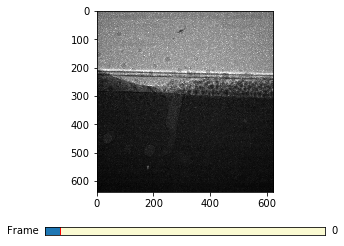

<ximage.widget.slider instance at 0x7fc8e02078c0>

In [6]:
ximage.slider(rdata[150:160:,:])

In [7]:
particle_bed_reference = ximage.particle_bed_location(rdata[0], plot=False)

In [8]:
print("Particle bed location: ", particle_bed_reference)

('Particle bed location: ', 253)


In [9]:
# Cut the images to remove the particle bed
cdata = rdata[:, 0:particle_bed_reference, :]

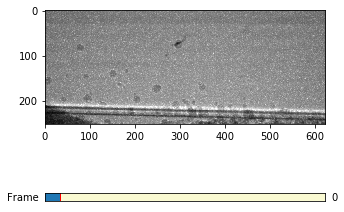

<ximage.widget.slider instance at 0x7fc8e0179fc8>

In [10]:
ximage.slider(cdata[150:160:,:])

In [11]:
# Find the image when the shutter starts to close
dark_index = ximage.shutter_off(rdata)
print("Shutter CLOSED on image: ", dark_index)

('Shutter CLOSED on image: ', 344)


In [12]:
# Find the images when the laser is on
laser_on_index = ximage.laser_on(rdata, particle_bed_reference, alpha=1.0)
print("Laser ON on image: ", laser_on_index)

('Laser ON on image: ', 46)


In [13]:
# Set the [start, end] index of the blocked images, flat and dark.
flat_range = [0, 1]
data_range = [laser_on_index, dark_index]
dark_range = [dark_index, nfile]

flat = cdata[flat_range[0]:flat_range[1], :, :]
proj = cdata[data_range[0]:data_range[1], :, :]
dark = np.zeros((dark_range[1]-dark_range[0], proj.shape[1], proj.shape[2]))  


In [14]:
# Normalize the images
ndata = tomopy.normalize(proj, flat, dark)
ndata = tomopy.normalize_bg(ndata, air=ndata.shape[2]/2.5)
ndata = tomopy.minus_log(ndata)

In [15]:
blur_radius = 3.0
threshold = .04
nddata = ximage.label(ndata, blur_radius, threshold)

Image 0 contains 8 particles
Image 1 contains 13 particles
Image 2 contains 10 particles
Image 3 contains 13 particles
Image 4 contains 12 particles
Image 5 contains 19 particles
Image 6 contains 21 particles
Image 7 contains 26 particles
Image 8 contains 23 particles
Image 9 contains 22 particles
Image 10 contains 24 particles
Image 11 contains 25 particles
Image 12 contains 29 particles
Image 13 contains 28 particles
Image 14 contains 29 particles
Image 15 contains 26 particles
Image 16 contains 28 particles
Image 17 contains 24 particles
Image 18 contains 24 particles
Image 19 contains 21 particles
Image 20 contains 23 particles
Image 21 contains 24 particles
Image 22 contains 23 particles
Image 23 contains 25 particles
Image 24 contains 27 particles
Image 25 contains 30 particles
Image 26 contains 30 particles
Image 27 contains 32 particles
Image 28 contains 33 particles
Image 29 contains 31 particles
Image 30 contains 32 particles
Image 31 contains 27 particles
Image 32 contains 2